# Ycatan Peninsula Hurricanes
## Week 4 - Section

**Description:** This dataset includes information about the Saffir-Simpson hurricane category for each hurricane.

**Citation:** Boose, E. and D. Foster. 2023. Ecological Impacts of Hurricanes Across the Yucatan Peninsula 1851-2000 ver 23. Environmental Data Initiative. https://doi.org/10.6073/pasta/f219113373913f2daf421732e28d3c38 (Accessed 2025-10-24).

**Date Accessed:** 10/24/2025

**Link:** https://portal.edirepository.org/nis/mapbrowse?packageid=knb-lter-hfr.71.23

## Data loading and preiliminary exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Data download url
url = "https://pasta.lternet.edu/package/data/eml/knb-lter-hfr/71/23/ab0fe2bf4f3ad850371ccb9c69d78469"

In [2]:
# Load in data
df = pd.read_csv(url)

In [3]:
# View data head
df.head()

,code,start.date,end.date,number,name,ss,track,rf.max
0,Y1852,1852-10-07,1852-10-08,5,NaN,2,O,F1
1,Y1857,1857-09-28,1857-09-28,4,NaN,2,N,F1
2,Y1861,1861-08-17,1861-08-17,2,NaN,1,O,Nd
3,Y1864,1864-08-31,1864-08-31,3,NaN,1,S,F1
4,Y1865,1865-09-11,1865-09-11,4,NaN,2,O,F1


In [4]:
# Checking for NA values
df.isna().sum()

code           0
start.date     0
end.date       0
number         0
name          72
ss             0
track          0
rf.max         0
dtype: int64

In [5]:
# Check shape
df.shape

(105, 8)

In [6]:
# Display dtypes and num non NA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   code        105 non-null    object
 1   start.date  105 non-null    object
 2   end.date    105 non-null    object
 3   number      105 non-null    int64 
 4   name        33 non-null     object
 5   ss          105 non-null    int64 
 6   track       105 non-null    object
 7   rf.max      105 non-null    object
dtypes: int64(2), object(6)
memory usage: 6.7+ KB


## Brainstorm

Q: How many hurricanes with Saffir-Simpson category 5 have been registered and what was their duration?

Plan: Filter to ss == 5, use value counts to see, add end date - start data column

## Data wrangling


In [7]:
# Filter for category 5 hurricanes
cat5 = df.loc[df["ss"] == 5, :].copy()

# number of cat 5 hurricanes
cat5.ss.count()

4

There have been 4 category 5 hurricanes

In [8]:
# Convert start and end dates to pd.datetime
cat5.loc[:, "start.date"] = pd.to_datetime(cat5.loc[:, "start.date"])

cat5.loc[:, "end.date"] = pd.to_datetime(cat5.loc[:, "end.date"])

# Add duration column
cat5['duration'] = cat5.loc[:, 'end.date'] - cat5.loc[:, 'start.date']

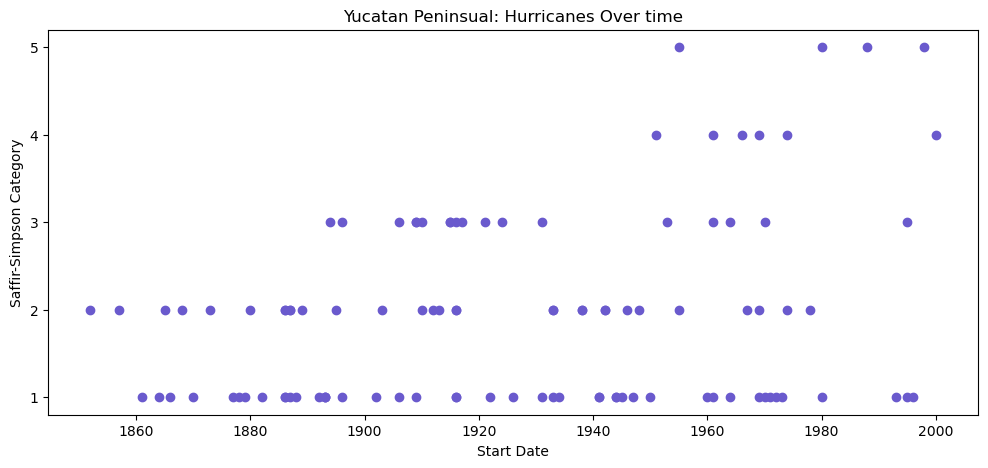

In [9]:
# Add year column to the original dataframe
df["year"] = pd.to_datetime(df["start.date"]).dt.year

# Plot 
fig, ax = plt.subplots(figsize = (12, 5))

plt.scatter(x = df['year'], 
            y = df["ss"],
            c = "slateblue")
plt.xlabel("Start Date")
plt.ylabel("Saffir-Simpson Category")
plt.yticks([1, 2, 3, 4, 5])
plt.title("Yucatan Peninsual: Hurricanes Over time")
plt.show()

### Plot Analysis

The scatter plot reveals a number of trends in hurricane activity across the Yucatan Peninsula from 1851 to 2000. Category 1 and 2 hurricanes occur consistently throughout the entire 150-year period, and are the most common hurricane categories. There are initially no records of Catagory 3 hurricanes before, but they start appearing reguluarly from the 1890s on. Category 4 and 5 hurricanes are the least common, with the first Catagory 4 appearing around 1950 and becoming more frequent in recent decades. All Category 5 hurricanes in this dataset occurred in the latter half of the 20th century (1955-2000). This concentration of the most intense hurricanes in recent decades may reflect improved measurement and classification technology, actual changes in hurricane intensity, or a combination of both factors.

## Streamlined code

In [10]:
# Filter for Category 5 hurricanes and create independent copy
cat5 = df[df['ss'] == 5].copy()

# Convert date columns to datetime format and calculate duration
cat5['start.date'] = pd.to_datetime(cat5['start.date'])
cat5['end.date'] = pd.to_datetime(cat5['end.date'])
cat5['duration'] = cat5['end.date'] - cat5['start.date']

# Display final results
print(f"Number of Category 5 hurricanes: {len(cat5)}")
print(f"\nDurations of Category 5 hurricanes:")
print(cat5[['name', 'start.date', 'duration']].to_string(index=False))
print(f"\nAverage duration: {cat5['duration'].dt.days.mean()} days")

Number of Category 5 hurricanes: 4

Durations of Category 5 hurricanes:
   name start.date duration
  Janet 1955-09-28   0 days
  Allen 1980-08-07   1 days
Gilbert 1988-09-14   1 days
  Mitch 1998-10-27   1 days

Average duration: 0.75 days


Between 1851 and 2000, **4 Category 5 hurricanes** were registered in the Yucatan Peninsula, with durations ranging from **0 to 1 days** resulting in an anverage duration of **0.75 days** accross all these events.